In [115]:
import cv2
import numpy as np
from Library import OpenCVWrapper as CV
sample = ( CV.Image("output.jpg",1)
    .cvtColor("GRAY")
    .gaussianBlur()
    .threshOTSU()
    .bitwiseNot()
    .fillHole()
    # .show()
)

# print(sample.prod)
bit = sample.prod.copy()

sure_bg = ( sample.opening(kernel_shape=(3,3), iter=2)
      .dilate(kernel_shape=(5,5), iter=10)
).prod

# print(sure_bg)
sample.show()

sample.prod = bit
sample.show()

dist_transform = cv2.distanceTransform(sample.opening(kernel_shape=(3,3), iter=10).prod, cv2.DIST_L2, 5)
ret, sample.prod = cv2.threshold(dist_transform, 0.8*dist_transform.max(), 255, 0)
sample.show()

sure_fg = np.uint8(sample.prod)


unknown = cv2.subtract(sure_bg,sure_fg)
# cv2.imshow("unknown",unknown)
sample.prod = bit
# sample.show()

ret, markers = cv2.connectedComponents(sure_fg)
markers = markers + 1
markers[unknown==255] = 0

markers = cv2.watershed(sample.raw, markers)
# print(markers)
sample.prod[markers==-1] = 0
sample.show()


53


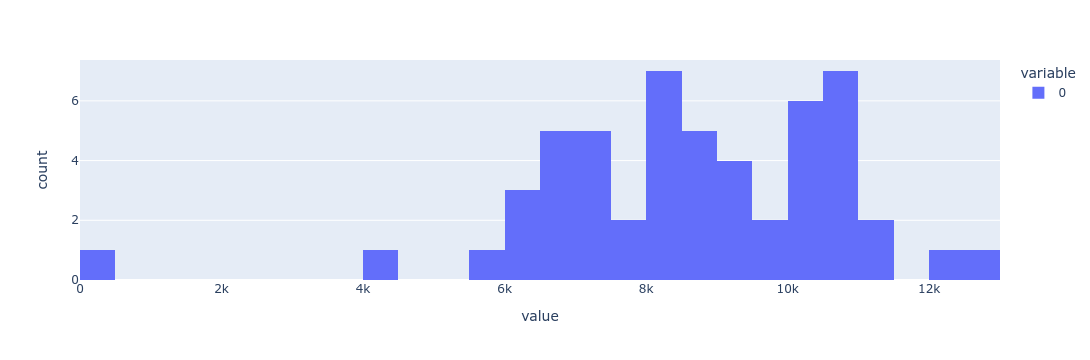

In [113]:
import cv2
import numpy as np
import pandas as pd
import plotly.graph_objects as gob
import plotly.express as px

sample.prod = bit
sample.prod[markers==-1] = 0
sample.gaussianBlur(kernel_shape=(25,25)).threshBinary().fillHole().show().findContours().drawContours().show().write("output2.jpg")

# print(sample.contours)

Arcs = [cv2.arcLength(cnt, True) for cnt in sample.contours] 
Areas = [cv2.contourArea(cnt) for cnt in sample.contours]

Circularities = [4*np.pi*area/(arc*arc) if arc >= 1 and area >= 1 else 0 for area, arc in zip(Areas, Arcs)]

# beanAreas = [area for area in Areas if area <= 900 and area >= 25000]
# maximum = max(beanAreas)
# normBeanAreas = [area for area in beanAreas]

print(len(Areas))
df = pd.DataFrame(Areas)

px.histogram(df, nbins=40)